# Bismillah

In [39]:
import matplotlib
import matplotlib.pyplot as plt
from pandas import read_excel
import seaborn

from model import Model
from linear_algebra import least_squares
%matplotlib inline

# Linear Algebra: Final Project
## Predicting Final Exam Scores using Linear Least Squares Regression
![title](img/intro.jpg)

# Abstract
### The aim of this study is to investigate the use of linear least squares regression in predicting final exam scores of university students. The study collected data from a sample of 43 students, including their preparation time, and midterm exam scores. The collected data was used to build a linear regression model using the least squares method. The results of the study showed that the linear regression model was able to accurately predict the final exam scores of the students, with a high degree of precision.


In [52]:
# reading data from xlsx file
data = read_excel('data.xlsx')
data.tail

<bound method NDFrame.tail of     Hours Studied  Exam Score
0               0          43
1               1          49
2               1          51
3               2          52
4               2          55
5               2          49
6               2          52
7               2          54
8               3          51
9               3          52
10              3          55
11              3          56
12              3          52
13              4          61
14              4          59
15              5          61
16              5          60
17              6          61
18              6          66
19              6          64
20              7          71
21              7          72
22              7          69
23              8          71
24              8          70
25              8          75
26              8          77
27              8          72
28              8          74
29              9          78
30             10          80
31        

<Axes: xlabel='Hours Studied', ylabel='Density'>

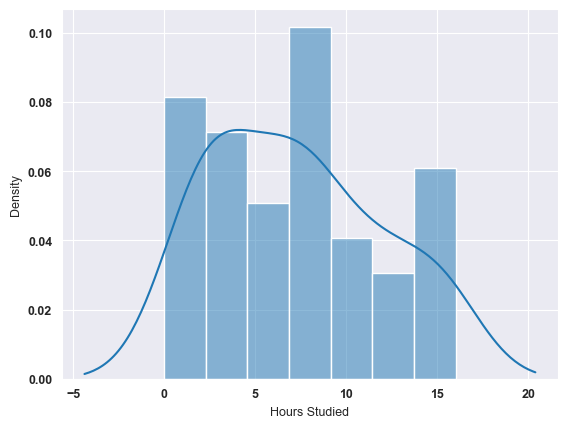

In [53]:
seaborn.histplot(
    data["Hours Studied"], kde=True,
    stat="density", kde_kws=dict(cut=2)
)

In [54]:
# extracting data from the data frame and initializing independent and dependent values
independent_values, dependent_values = list(data['Hours Studied']), list(data['Exam Score'])

In [55]:
# something from calculus class
simple_linear_regression = Model(independent_values, dependent_values)
slr_slope, slr_intercept = simple_linear_regression.slope, simple_linear_regression.intercept

![title](img/2.png)
B_0 - intercept, B_1 - slope

In [57]:
ls = least_squares(independent_values, dependent_values)
ls_slope, ls_intercept = ls[0][0], ls[1][0]

![title](img/3.png)
### product of A matrix times colum vector X is in
### the vector space of the column space of matrix A,
### so A*x gives us a vector that is in the column space of A.
### If A*x == B (which is over determinant) that means
### b is not in the colum space of matrix A, so there is no solution.

### in order to solve this equation and find best solution
### we can do project matrix B onto the column space of matrix A.
### A*x == Bproj_col_sapce(A), so in the end we will get
### matrix[[slope], [intercept]]

In [59]:
def predict(slope: float, intercept: float, x: float) -> float:
    return slope * x + intercept

In [58]:
def my_plot(x_values, y_values, slope, intercept, label, color='red'):
    def function() -> list[float]:
        new_values = [0] * len(x_values)
        for index, x_value in enumerate(x_values):
            new_values[index] = slope * x_value + intercept
        return new_values
    font = {'weight': 'bold', 'size': 9}
    matplotlib.rc('font', **font)
    fig, ax = plt.subplots()
    ax.spines["left"].set_position(("data", 0))
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.plot(1, 0, ">k", transform = ax.get_yaxis_transform(), clip_on = False)
    ax.plot(0, 1, "^k", transform = ax.get_xaxis_transform(), clip_on = False)

    plt.scatter(x_values, y_values)
    plt.plot(x_values, function(), label='qwe', color=color)
    plt.title(label, fontsize=20, color=color)
    plt.xlabel('Hours Studied')
    plt.ylabel('Exam Score')
    plt.show()

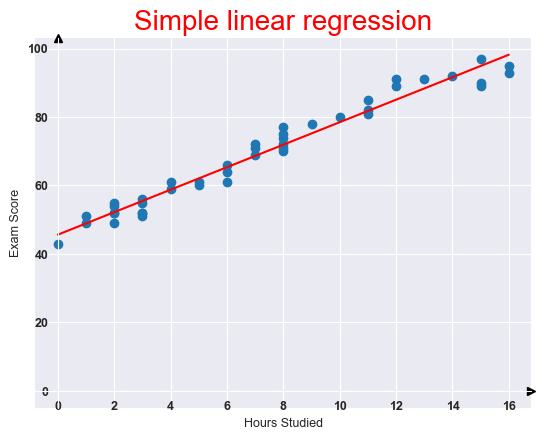

3.2866434497592927 45.61784287616513


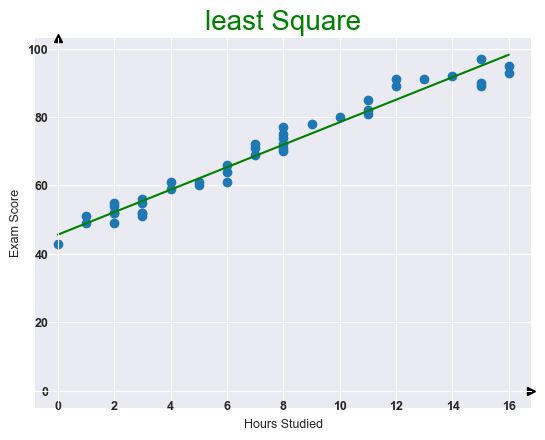

3.286643449759297 45.6178428761651
difference: 
slope -> 4.440892098500626e-15
intercept -> 2.842170943040401e-14


In [60]:
my_plot(independent_values, dependent_values, slr_slope, slr_intercept,'Simple linear regression')
print(slr_slope, slr_intercept)
my_plot(independent_values, dependent_values, ls_slope, ls_intercept, 'least Square', 'green')
print(ls_slope, ls_intercept)
print(f'difference: \nslope -> {abs(slr_slope - ls_slope)}\nintercept -> {abs(slr_intercept - ls_intercept)}')

In [61]:
hours_predicted = [3, 6, 10, 14, 15]
predicted_scores = [predict(ls_slope, ls_intercept, h_p) for h_p in hours_predicted]

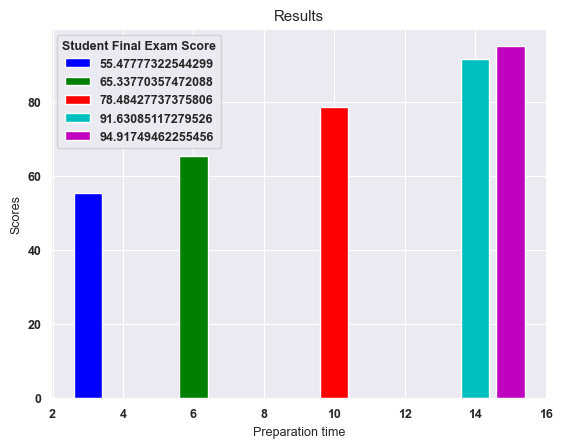

In [62]:
fig, ax = plt.subplots()
bar_colors = ['b', 'g', 'r', 'c', 'm']
ax.bar(hours_predicted, predicted_scores, label=predicted_scores, color=bar_colors)
ax.set_ylabel('Scores')
ax.set_xlabel('Preparation time')
ax.set_title('Results')
ax.legend(title='Student Final Exam Score')
plt.show()

# References:

## Jeffrey Chasnov
[https://www.youtube.com/watch?v=RlQBEhLhM8Y](https://www.youtube.com/watch?v=RlQBEhLhM8Y)

## M, Mogessie
### Predicting Students’ Final Exam Scores from Their Course Activities

# Stack:

## Python, seaborn, matplotlib, pandas

# Obstacles:
1) Used to use ready-made solution without understanding logic/idea behind them (Numpy, Sympy, SciPy)
2) did not have clear picture about Vector spaces
3) developing own methods for linear algebra
4) gathering relevant data

# What I learned
1) Vector spaces, fastest way to find determinant
2) Least Squares method
3) Manipulating matrices with code
4) Finding outliers
